<a href="https://colab.research.google.com/github/chan-kh/Music-Sentiment-Analysis/blob/main/LSTM_2outputs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [96]:
import os
import datetime
from google.colab import drive

import IPython
import IPython.display
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf
import tensorflow_datasets as tfds
from sklearn.preprocessing import MinMaxScaler

from numpy import loadtxt
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import Dropout

from keras import layers
from keras.optimizers import RMSprop
from keras.layers import Bidirectional

from math import sqrt
from scipy.stats.stats import pearsonr, spearmanr
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [97]:
drive.mount("/content/drive")
df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Sentiment/features_60frames_allsongs.csv')
df.head()


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,song_id,frame_num,zcr,rms,spectral_centroid,spectral_bandwidth,spectral_rolloff,spectral_contrast,spectral_flatness,melspectrogram,mfcc_0,mfcc_1,mfcc_2,mfcc_3,mfcc_4,mfcc_5,mfcc_6,mfcc_7,mfcc_8,mfcc_9,mfcc_10,mfcc_11,mfcc_12,mfcc_13,mfcc_14,mfcc_15,mfcc_16,mfcc_17,mfcc_18,mfcc_19,chroma_stft_0,chroma_stft_1,chroma_stft_2,chroma_stft_3,chroma_stft_4,chroma_stft_5,chroma_stft_6,chroma_stft_7,chroma_stft_8,chroma_stft_9,chroma_stft_10,chroma_stft_11,chroma_cqt_0,chroma_cqt_1,chroma_cqt_2,chroma_cqt_3,chroma_cqt_4,chroma_cqt_5,chroma_cqt_6,chroma_cqt_7,chroma_cqt_8,chroma_cqt_9,chroma_cqt_10,chroma_cqt_11,chroma_cens_0,chroma_cens_1,chroma_cens_2,chroma_cens_3,chroma_cens_4,chroma_cens_5,chroma_cens_6,chroma_cens_7,chroma_cens_8,chroma_cens_9,chroma_cens_10,chroma_cens_11,tonnetz_0,tonnetz_1,tonnetz_2,tonnetz_3,tonnetz_4,tonnetz_5,valence,arousal
0,2,0,0.157715,0.000011,5604.262879,3246.069688,9549.975586,18.349374,0.283305,0.000000,-636.134705,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.654255,0.699066,0.261531,0.874848,1.000000,0.333313,0.812421,0.488101,0.413135,0.640419,0.671442,0.490904,0.725918,0.250459,0.284098,0.647150,0.349017,0.147453,0.501239,0.074669,0.070883,0.633342,0.184297,0.136420,0.700169,0.030602,0.209675,0.828279,0.124886,0.257948,1.000000,0.071105,0.309559,0.798000,0.076693,0.276441,-0.134078,0.072852,-0.134683,0.086125,0.060471,0.042898,-0.073341,-0.109386
1,2,1,0.051758,0.096817,1443.667160,2057.611806,3036.181641,27.017306,0.003931,1.576688,-120.319748,129.464996,-4.253306,22.214062,8.163963,16.415987,15.152133,7.878392,-6.823561,-0.831550,-7.218902,-4.558928,-1.807601,12.948887,-9.162554,-3.758020,-5.506585,-1.227700,-4.439484,1.684063,0.528904,0.624552,0.263783,0.891966,0.850903,0.331133,1.000000,1.000000,0.408033,0.713866,0.681263,0.480444,0.245905,0.378263,0.278916,0.160639,0.397115,0.147040,0.285743,0.536704,0.072041,0.314144,0.652729,0.144099,0.269362,0.637670,0.218737,0.382769,0.677961,0.263132,0.424450,0.649488,0.317883,0.517798,0.579528,0.282752,-0.088692,0.052331,-0.112961,0.075804,0.041915,0.033029,-0.074661,-0.114942
2,2,2,0.101562,0.096426,2348.097128,2387.006355,4941.870117,22.434103,0.013857,0.152583,-107.915352,76.319107,-14.175928,45.124214,1.209538,7.516734,-5.023264,6.480774,-0.513962,8.108901,-0.198636,-3.022716,2.078595,4.819644,-16.200150,-3.348299,-5.746615,-9.680576,-17.688511,-5.846364,0.190785,0.290683,0.265836,0.206553,0.217986,0.329024,0.491271,0.576434,0.402986,1.000000,0.924618,0.469653,0.706139,0.605435,0.273279,0.307669,0.224213,0.146400,0.107266,0.206321,0.073380,0.222554,0.297425,0.151825,0.408395,0.409732,0.227828,0.563377,0.734764,0.268284,0.755202,1.000000,0.326054,0.528056,0.687259,0.288720,-0.034494,0.031843,-0.070020,0.068549,0.021691,0.023202,-0.074077,-0.116413
3,2,3,0.062500,0.086847,1692.187106,1872.280637,3219.213867,21.295763,0.004178,0.224268,-148.255432,121.565720,-36.703545,33.151939,4.518500,5.197342,-8.610166,4.267920,8.706326,-17.273952,-11.429454,4.515498,-7.324573,4.467141,-13.720921,-3.195490,-3.931114,-7.317858,-15.654930,-15.824336,0.245845,0.300974,0.267710,0.523842,0.578168,0.326966,1.000000,0.842026,0.397746,0.846539,1.000000,0.458391,0.477668,0.673670,0.267148,0.095004,0.189054,0.145584,0.031817,0.101448,0.075003,0.024125,0.114284,0.159790,0.044276,0.137589,0.237066,0.215029,0.300263,0.273559,0.177739,0.341496,0.334054,0.110806,0.207098,0.294537,-0.013095,0.020309,-0.055259,0.034349,0.011610,0.012032,-0.078154,-0.118613
4,2,4,0.120605,0.113167,2632.895857,2453.043616,5329.467773,18.914987,0.025196,1.035493,-71.919838,76.267471,-28.003765,15.988888,4.667567,35.548042,-6.664427,-5.128408,9.827440,-1.635414,-5.240368,-1.569069,-1.458279,7.581460,-16.175152,-6.295955,-9.435411,-3.781498,-8.782184,-7.635081,0.223808,0.355715,0.269517,0.202841,0.376315,0.324933,0.624933,0.684395,0.392219,1.000000,1.000000,0.446547,0.319092,0.

In [98]:
df.shape

(104640, 74)

In [99]:
df =df.iloc[np.random.permutation(np.arange(104640).reshape(-1,60)).ravel()]

In [100]:
# df.to_csv('/content/drive/My Drive/Colab Notebooks/Sentiment/shuffled_data.csv',index=False)

In [101]:
df.shape

(104640, 74)

In [102]:
df.pop('song_id')
df.pop('frame_num')

6000       0
6001       1
6002       2
6003       3
6004       4
          ..
102235    55
102236    56
102237    57
102238    58
102239    59
Name: frame_num, Length: 104640, dtype: int64

In [103]:
y = df.loc[:,'valence':'arousal']
print(y.shape)
y.head()

(104640, 2)


,valence,arousal
6000,0.294602,0.012693
6001,0.294602,0.031680
6002,0.298488,0.035081
6003,0.306569,0.037969
6004,0.313229,0.039714


In [104]:
df.pop('valence')
df.pop('arousal')

6000      0.012693
6001      0.031680
6002      0.035081
6003      0.037969
6004      0.039714
            ...   
102235    0.494000
102236    0.474000
102237    0.449000
102238    0.420000
102239    0.407000
Name: arousal, Length: 104640, dtype: float64

In [105]:
df.head()


,zcr,rms,spectral_centroid,spectral_bandwidth,spectral_rolloff,spectral_contrast,spectral_flatness,melspectrogram,mfcc_0,mfcc_1,mfcc_2,mfcc_3,mfcc_4,mfcc_5,mfcc_6,mfcc_7,mfcc_8,mfcc_9,mfcc_10,mfcc_11,mfcc_12,mfcc_13,mfcc_14,mfcc_15,mfcc_16,mfcc_17,mfcc_18,mfcc_19,chroma_stft_0,chroma_stft_1,chroma_stft_2,chroma_stft_3,chroma_stft_4,chroma_stft_5,chroma_stft_6,chroma_stft_7,chroma_stft_8,chroma_stft_9,chroma_stft_10,chroma_stft_11,chroma_cqt_0,chroma_cqt_1,chroma_cqt_2,chroma_cqt_3,chroma_cqt_4,chroma_cqt_5,chroma_cqt_6,chroma_cqt_7,chroma_cqt_8,chroma_cqt_9,chroma_cqt_10,chroma_cqt_11,chroma_cens_0,chroma_cens_1,chroma_cens_2,chroma_cens_3,chroma_cens_4,chroma_cens_5,chroma_cens_6,chroma_cens_7,chroma_cens_8,chroma_cens_9,chroma_cens_10,chroma_cens_11,tonnetz_0,tonnetz_1,tonnetz_2,tonnetz_3,tonnetz_4,tonnetz_5
6000,0.141113,0.000010,5451.606124,3207.522551,9280.810547,17.201578,0.294784,0.000000,-561.617371,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.794174,1.000000,0.304179,0.777023,0.512578,0.339244,0.894913,0.634983,0.389342,0.904084,0.347266,0.381413,1.000000,0.281876,0.313827,0.861948,0.324543,0.185899,0.707108,0.064382,0.106956,0.804820,0.392920,0.122715,0.920282,0.043195,0.115549,0.668877,0.469315,0.361519,0.778337,0.252722,0.353159,0.945763,0.304892,0.258869,0.127498,0.244201,-0.056465,0.080581,0.012394,0.054779
6001,0.070312,0.160624,1578.628939,1792.320573,3176.147461,23.359878,0.001231,0.068604,-127.679337,130.868637,-13.561966,37.563728,-3.118347,2.024320,-0.441411,-2.874517,-4.389047,14.443587,15.189127,12.707404,-10.949821,-3.817486,-2.781801,6.440133,-4.067625,4.070465,8.320124,-6.586600,0.056849,0.082226,0.317466,0.107098,0.063184,0.345458,0.455835,0.653647,0.371558,0.944236,1.000000,0.366754,0.336722,0.452403,0.316715,0.126117,0.069034,0.196198,0.218736,0.155410,0.112954,1.000000,0.236836,0.119453,0.244571,0.120829,0.120914,0.076822,0.143545,0.364675,0.377864,0.241040,0.351587,0.141533,0.135133,0.265066,0.034303,0.090570,-0.001988,0.014742,-0.000943,0.014890
6002,0.059570,0.134000,1437.271925,2143.414058,3079.248047,26.475980,0.000295,0.024787,-198.893539,121.950150,9.176940,29.434889,9.993509,17.735172,31.758251,18.087759,10.631529,-7.000125,-11.175638,-6.225150,16.539246,-6.256649,-21.957447,7.558070,-11.520791,-9.982869,10.335238,8.007994,0.448922,0.078883,0.330740,0.316128,0.092846,0.350692,0.598222,0.655061,0.353385,1.000000,1.000000,0.352001,0.635603,0.472281,0.320058,0.315811,0.038202,0.207496,0.185165,0.072753,0.119489,0.225106,0.105957,0.116371,0.049091,0.050351,0.125712,0.015765,0.053205,0.367039,0.051849,0.067186,0.348992,0.110364,0.069138,0.270578,0.006101,0.025003,0.009455,0.010212,-0.003536,0.003332
6003,0.086426,0.133992,1594.489503,1753.154011,3111.547852,22.812773,0.001086,0.094767,-150.320114,118.856476,-28.151754,22.274742,-18.738892,2.935785,5.585246,4.892658,9.589656,12.104349,10.895155,10.744671,7.328943,-14.161003,-16.797060,-8.592272,-5.751778,-0.773222,-1.273052,-1.955971,0.049758,0.242632,0.344157,0.020306,0.158737,0.355162,0.063541,0.595995,0.334814,0.359435,0.963544,0.337154,0.081149,0.474327,0.323609,0.017476,0.154847,0.219306,0.097684,0.411432,0.126220,1.000000,0.801530,0.113359,0.312496,0.555487,0.129841,0.046303,0.740701,0.368455,0.121028,1.000000,0.345608,0.049262,0.495642,0.275645,-0.000697,0.009782,0.007624,0.020318,-0.002627,0.003008
6004,0.066406,0.179081,1187.876099,1504.160814,2271.752930,25.055424,0.000435,1.428291,-140.792297,153.991302,-12.304159,35.381855,-3.984808,-4.250056,1.597709,-8.591660,10.093275,11.263559,9.918025,12.500872,21.627079,-4.515545,-20.598873,-8.221111,-8.154872,-10.602357,-10.007217,-8.833066,0.028428,0.092178,0.357759,0.174923,0.579406,0.358978,0.747368,1.000000,0.316034,0.208005,0.487870,0.322173,0.112299,0.179941,0.327110,1.000000,0.305064,0.231164,0.314643,0.183345,0.133011,0.012239,0.044711,0.110580,0.033761,0.15452

In [106]:
# df_mean = df.mean()
# df_std = df.std()

# df = (df - df_mean) / df_std


In [107]:
# print(type(df))

In [108]:
features = df.to_numpy()
y = y.to_numpy()

In [109]:
print(features.shape)
print(y.shape)

(104640, 70)
(104640, 2)


In [110]:
features = features.reshape(1744,60,70)
y = y.reshape(1744,60,2)

In [111]:
train_X , train_y = features[0:1220] , y[0:1220]
test_X , test_y = features[1220:1744] , y[1220:1744]
# val_X , val_y = features [1569:1744] , valence[0:1220]

In [112]:
print("train_X :" , train_X.shape , "train_y shape:" , train_y.shape)
print("test_X :" , test_X.shape , "test_y shape:" , test_y.shape)
# print("val_X :" , val_X.shape , "val_y shape:" , val_y.shape)


train_X : (1220, 60, 70) train_y shape: (1220, 60, 2)
test_X : (524, 60, 70) test_y shape: (524, 60, 2)


In [113]:
# print(features.shape)
# for i in range(1):
#   print(features)

In [114]:
# print(valence.shape)
# print(valence)

In [115]:
# print(type(features))
# print(features.shape)

In [116]:
model = Sequential()

# model.add(Bidirectional(LSTM(128,return_sequences=True, input_shape=(60,70))))
# model.add(Dropout(0.2))
# model.add(Bidirectional(LSTM(128,return_sequences=True, input_shape=(60,70))))
# model.add(Dropout(0.2))
# model.add(Bidirectional(LSTM(128,return_sequences=True, input_shape=(60,70))))
# model.add(Dropout(0.2))

# model.add(Bidirectional(LSTM(128,return_sequences=True, input_shape=(60,70))))
model.add(Bidirectional(LSTM(128,return_sequences=True, input_shape=(60,70))))
model.add(Dropout(0.3))
model.add(Bidirectional(LSTM(128,return_sequences=True, input_shape=(60,70))))
model.add(Dropout(0.3))
# model.add(Bidirectional(LSTM(64,return_sequences=True, input_shape=(60,70))))
# model.add(Dropout(0.3))
# model.add(Bidirectional(LSTM(32,return_sequences=True, input_shape=(60,70))))
# model.add(Bidirectional(LSTM(16,return_sequences=True, input_shape=(60,70))))
# model.add(Bidirectional(LSTM(8,return_sequences=True, input_shape=(60,70))))




model.add(Dense(2))
model.compile(loss='mse', optimizer='adam')

In [117]:
history = model.fit(train_X, train_y, epochs=100, validation_data=(test_X, test_y), verbose=2, shuffle=False)


Epoch 1/100
39/39 - 2s - loss: 0.1207 - val_loss: 0.0565
Epoch 2/100
39/39 - 1s - loss: 0.0607 - val_loss: 0.0477
Epoch 3/100
39/39 - 1s - loss: 0.0546 - val_loss: 0.0455
Epoch 4/100
39/39 - 1s - loss: 0.0502 - val_loss: 0.0452
Epoch 5/100
39/39 - 1s - loss: 0.0482 - val_loss: 0.0460
Epoch 6/100
39/39 - 1s - loss: 0.0472 - val_loss: 0.0429
Epoch 7/100
39/39 - 1s - loss: 0.0454 - val_loss: 0.0432
Epoch 8/100
39/39 - 1s - loss: 0.0456 - val_loss: 0.0428
Epoch 9/100
39/39 - 1s - loss: 0.0436 - val_loss: 0.0429
Epoch 10/100
39/39 - 1s - loss: 0.0438 - val_loss: 0.0424
Epoch 11/100
39/39 - 1s - loss: 0.0432 - val_loss: 0.0417
Epoch 12/100
39/39 - 1s - loss: 0.0421 - val_loss: 0.0420
Epoch 13/100
39/39 - 1s - loss: 0.0424 - val_loss: 0.0419
Epoch 14/100
39/39 - 1s - loss: 0.0417 - val_loss: 0.0405
Epoch 15/100
39/39 - 1s - loss: 0.0409 - val_loss: 0.0404
Epoch 16/100
39/39 - 1s - loss: 0.0404 - val_loss: 0.0400
Epoch 17/100
39/39 - 1s - loss: 0.0411 - val_loss: 0.0411
Epoch 18/100
39/39 - 1s

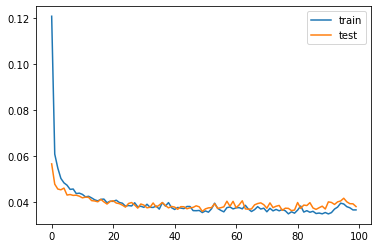

<Figure size 432x288 with 0 Axes>

In [118]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()
plt.savefig("training loss 350epochs_5layers")

In [119]:
history.history
print('overall loss' , np.mean(history.history['loss']))
print('overall val_loss' , np.mean(history.history['val_loss']))

overall loss 0.039418045878410336
overall val_loss 0.03923206508159637


In [120]:
predicted_y = model.predict(test_X)


In [121]:
print(predicted_y.shape)
print(test_y.shape)

(524, 60, 2)
(524, 60, 2)


In [122]:
predicted_valence = predicted_y[:,:,0]
predicted_arousal = predicted_y[:,:,1]
test_valence = test_y[:,:,0]
test_arousal = test_y[:,:,1]

In [123]:
# for i in range(1):
  # print(predicted_valence[i])
  # print(predicted_arousal[i])
  # print(test_valence[i])
  # print(test_arousal[i])

In [124]:
predicted_valence = predicted_valence.reshape(31440,)
test_valence = test_valence.reshape(31440,)
predicted_arousal = predicted_arousal.reshape(31440,)
test_arousal = test_arousal.reshape(31440,)

In [125]:
def metrics(y_true,y_pred,name):
  print(name,"")
  mae = mean_absolute_error(y_true,y_pred)
  rmse = sqrt(mean_squared_error(y_true,y_pred))
  r2 = r2_score(y_true,y_pred)
  pearson_corr = pearsonr(y_true,y_pred)
  spearman_corr = spearmanr(y_true,y_pred)
  
  print('RMSE : ',rmse)
  print('Pearson : ',pearson_corr)
  print('MAE : ',mae)
  print('R2 : ',r2)
  print('Spearman : ',spearman_corr,'\n')


In [126]:
def graph_results(x,y,title, xlim=-1, ylim=-1):
  #x and y are variables ( y_pred vs y_true )
  #Important
  plt.scatter(x,y,s=15)

  # if xlim != -1: plt.xlim([0, xlim])
  # if ylim != -1: plt.ylim([0, ylim])
  # plt.gca().set_ylim([1.5,7.5])
  # plt.gca().set_xlim([1.5,9])
  #Fix 
  plt.xlabel("Actual")
  plt.ylabel("Predicted")
  plt.title((title))
  # m, b = np.polyfit(x, y, 1)
  # plt.plot(x, m*x + b, color='red')  
  plt.savefig(title)

  plt.show()

valence 
RMSE :  0.20389463126297605
Pearson :  (0.5023936314659895, 0.0)
MAE :  0.16477665335836292
R2 :  0.24671395888305292
Spearman :  SpearmanrResult(correlation=0.5009811703701559, pvalue=0.0) 



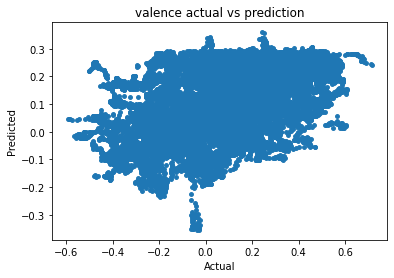

In [127]:
metrics(test_valence,predicted_valence,'valence')
graph_results(test_valence,predicted_valence,'valence actual vs prediction')


arousal 
RMSE :  0.18514979306853396
Pearson :  (0.7798058612635339, 0.0)
MAE :  0.1510438101515187
R2 :  0.5999385568227855
Spearman :  SpearmanrResult(correlation=0.7806283499263154, pvalue=0.0) 



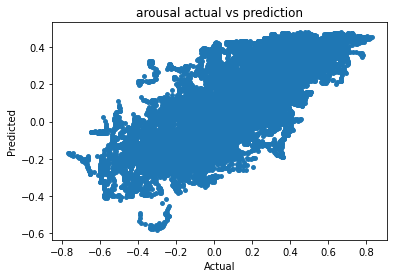

In [128]:
metrics(test_arousal,predicted_arousal,'arousal')
graph_results(test_arousal,predicted_arousal,'arousal actual vs prediction')